In [2]:
from deap import base, creator, tools, algorithms
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df_moterway = pd.read_csv('Average_status.csv')
display(df_moterway)


df_moterway['status_3_ratio_mean'] = df_moterway['status_3_ratio_mean']*df_moterway['ratios_length']*17

#sort by status_3_ratio_mean
df_moterway = df_moterway.sort_values(by='status_3_ratio_mean', ascending=True)
display(df_moterway[['Unnamed: 0','longitude', 'latitude', 'status_3_ratio_mean']])
df_moterway[['Unnamed: 0','longitude', 'latitude', 'status_3_ratio_mean']].to_csv('Allstations.csv', index=False)


,Unnamed: 0,slug,status_3_ratio_mean,status_3_ratio_var,latitude,longitude,ratios,ratios_length,minCapacity,maxCapacity
0,329,x5623z,0.759760,0.182567,55.732861,12.386630,[0.7597597597597597],1,50.0,50.0
1,47,5nykwy,0.579191,0.243785,55.858522,9.851593,[0.5791907514450867],1,75.0,75.0
2,196,jq8xwm,0.557396,0.246763,55.723784,9.583650,[0.5573961735884274],1,50.0,50.0
3,12,2j72qy,0.540725,0.150718,55.614600,12.355200,"[0.5385325334563913, 0.5429164743885556]",2,43.0,50.0
4,214,kj9rwe,0.536461,0.119460,55.626754,12.575313,"[0.41407338597306087, 0.6588481189038551]",2,43.0,50.0
...,...,...,...,...,...,...,...,...,...,...
395,90,7nyr93,0.009227,0.009144,56.781975,8.836123,[0.00922722029988466],1,50.0,50.0
396,349,y67jq,0.008146,0.002712,56.964766,9.241929,"[0.0349002849002849, 0.002849002849002849, 0.0...",5,11.0,150.0
397,46,5np96k,0.007568,0.003728,57.061677,10.182387,"[0.0122537241710716, 0.0028832292167227293]",2,90.0,90.0
398,31,39xd56,0.006498,0.003208,55.414030,11.342991,"[0.003716608594657375, 0.0, 0.0111394755163611...",4,50.0,60.0


,Unnamed: 0,longitude,latitude,status_3_ratio_mean
399,114,10.648394,55.501504,0.078868
395,90,8.836123,56.781975,0.156863
397,46,10.182387,57.061677,0.257328
394,267,9.129680,55.130120,0.369053
398,31,11.342991,55.414030,0.441866
...,...,...,...,...
76,118,11.361842,55.387910,125.194001
64,308,9.716938,55.534483,128.493454
72,255,10.419778,55.352714,138.276680
5,275,12.161393,55.489341,139.302812


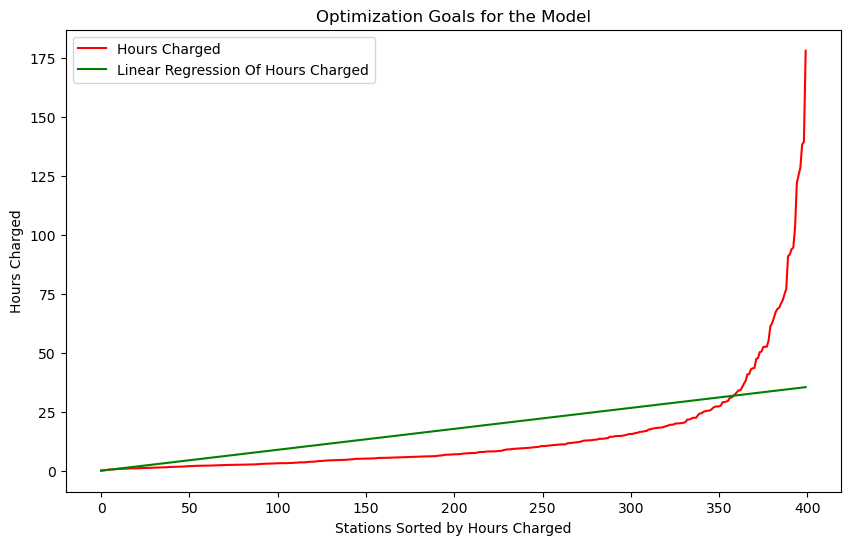

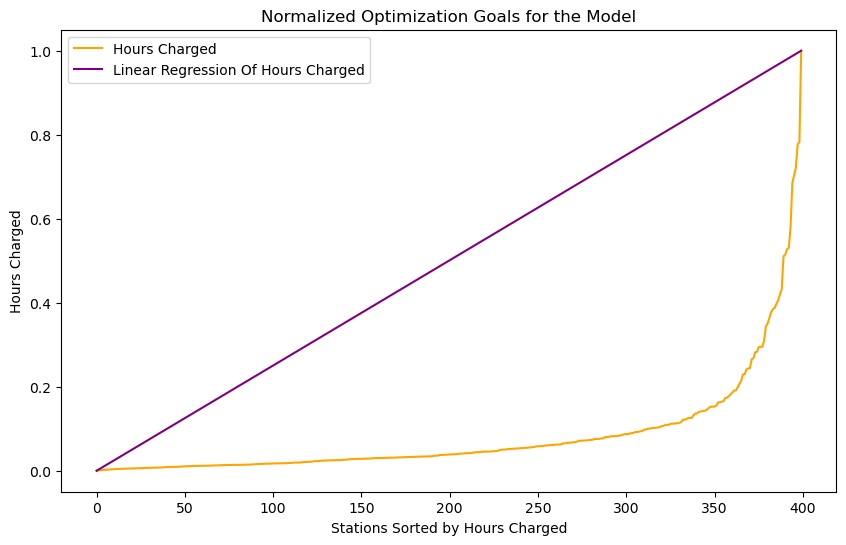

In [4]:
X = np.arange(len(df_moterway)).reshape(-1, 1)  # Element numbers as X
y_original = df_moterway['status_3_ratio_mean'].values.reshape(-1, 1)  # status_3_ratio_mean as Y, reshaped for scaler

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y_original)

# Fit the model
model = LinearRegression(fit_intercept=False)
model.fit(X, y_original)

# Predict using the scaled features
y_lin = model.predict(X)
y_scaled_lin = scaler_y.fit_transform(y_lin)

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.plot(X, y_original, color='red', label='Hours Charged')
plt.plot(X, y_lin, color='green', label='Linear Regression Of Hours Charged')

plt.title('Optimization Goals for the Model')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.plot(X, y_scaled, color='orange', label='Hours Charged')
plt.plot(X, y_scaled_lin, color='purple', label='Linear Regression Of Hours Charged')

plt.title('Normalized Optimization Goals for the Model')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()

C++ program output:
 Time taken: 8029 milliseconds



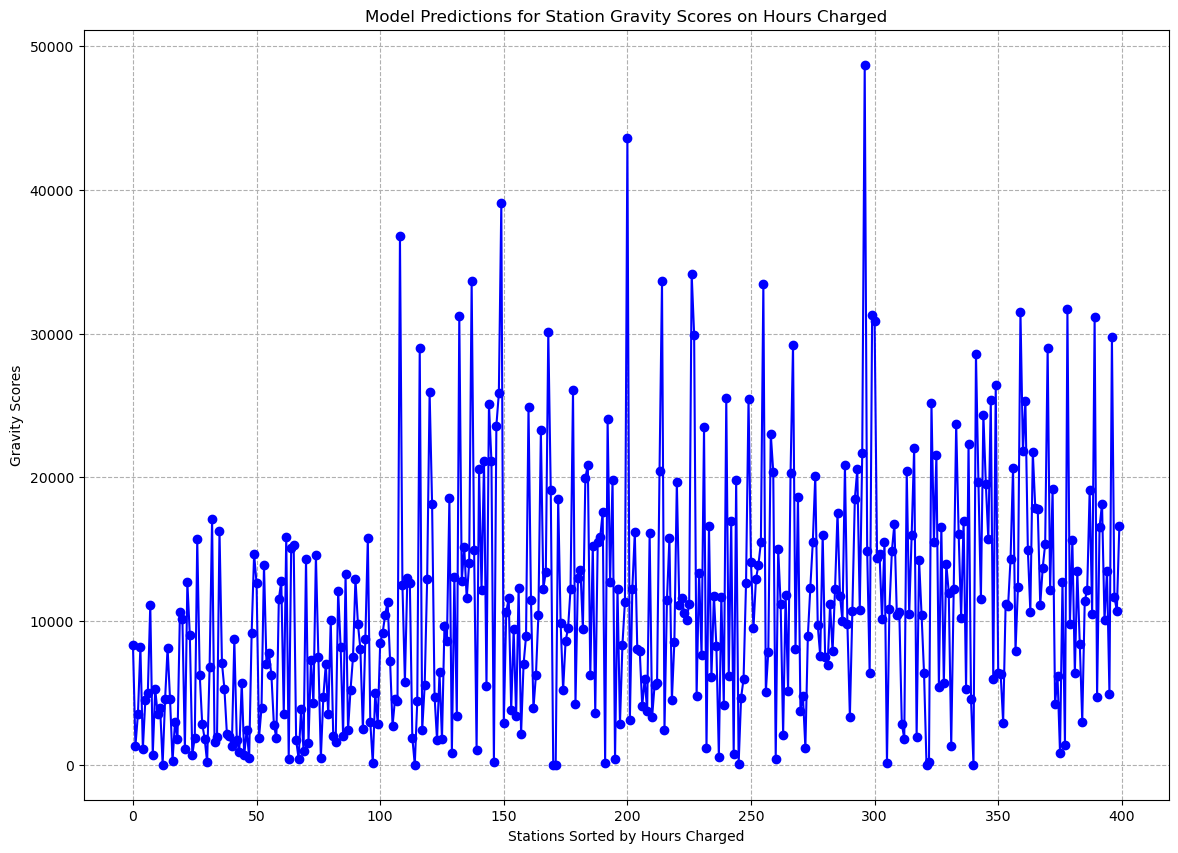

,longitude,latitude,gravity,traffic,apartments,cinemas,clinics,colleges,communityCentres,conferenceCentres,...,placesOfWorship,restaurants,shopMalls,shopSupermarkets,sportsCentres,sportsHalls,stadiums,substationMinorDistributions,theatres,universities
0,10.64840,55.5015,8342.56,467.19900,0.0000,0.0,0.0,0.0000,375.3590,0.0,...,4000.0000,0.000,0.0,3500.000,0.0,0.000,0.0,0.00,0.0,0.0000
1,8.83612,56.7820,1314.26,0.00000,0.0000,0.0,0.0,0.0000,0.0000,0.0,...,135.6150,0.000,0.0,46.877,0.0,0.000,0.0,0.00,0.0,0.0000
2,10.18240,57.0617,3500.00,0.00000,0.0000,0.0,0.0,0.0000,0.0000,0.0,...,0.0000,0.000,0.0,3500.000,0.0,0.000,0.0,0.00,0.0,0.0000
3,9.12968,55.1301,8190.66,32.06440,0.0000,0.0,0.0,0.0000,0.0000,0.0,...,158.5920,4500.000,0.0,3500.000,0.0,0.000,0.0,0.00,0.0,0.0000
4,11.34300,55.4140,1109.43,0.00000,87.6729,0.0,0.0,76.4412,0.0000,0.0,...,0.0000,433.051,0.0,247.254,0.0,0.000,0.0,0.00,0.0,68.0789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,11.36180,55.3879,4930.46,0.00000,0.0000,0.0,0.0,0.0000,52.2353,0.0,...,48.8360,0.000,0.0,155.218,0.0,128.409,0.0,0.00,0.0,0.0000
396,9.71694,55.5345,29781.60,0.00000,0.0000,0.0,0.0,0.0000,0.0000,0.0,...,41.9373,0.000,0.0,725.792,0.0,0.000,0.0,0.00,0.0,0.0000
397,10.41980,55.3527,11669.00,1.50791,112.8340,0.0,0.0,0.0000,0.0000,0.0,...,0.0000,0.000,0.0,0.000,0.0,0.000,0.0,1231.55,0.0,0.0000
398,12.16140,55.4893,10715.70,75.85410,0.0000,0.0,0.0,818.1970,0.0000,0.0,...,0.0000,0.000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,0.0000


longitude                       4.260223e+03
latitude                        2.233823e+04
gravity                         4.424841e+06
traffic                         2.318268e+04
apartments                      6.771420e+05
cinemas                         6.955214e+04
clinics                         5.306245e+04
colleges                        4.374517e+04
communityCentres                9.828949e+04
conferenceCentres               4.962719e+03
dentists                        7.207895e+04
eventsVenues                    5.171246e+04
fastFoods                       6.241395e+05
hospitals                       2.922153e+04
hotels                          5.382339e+04
leisureFitnessCentres           1.778436e+05
leisureStadiums                 6.429238e+03
motorwayLinks                   5.685212e+05
motorways                       6.533073e+04
parkings                        0.000000e+00
placesOfWorship                 1.670113e+05
restaurants                     5.612592e+05
shopMalls 

Mean Squared Error (MSE) on scaled data: 0.05980710408503088
Root Mean Squared Error (RMSE) on scaled data: 0.24455491016340455


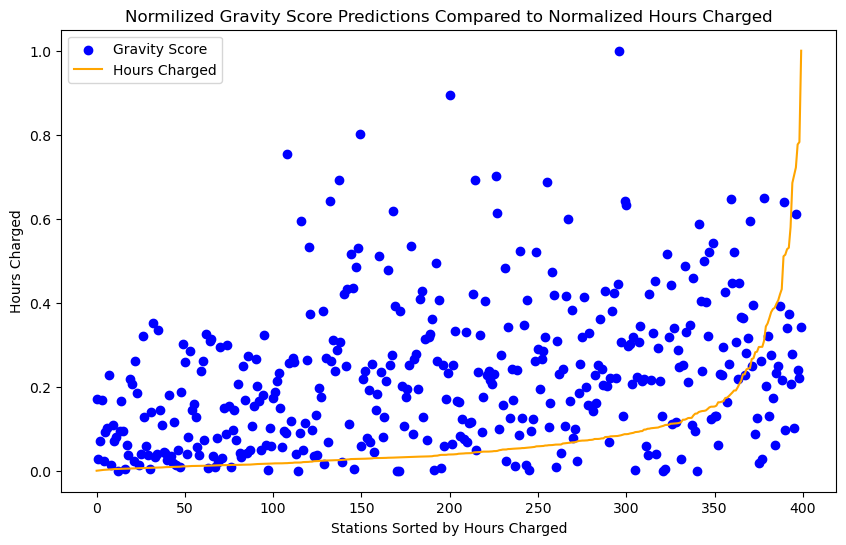

Mean Squared Error (MSE) on scaled data: 0.15615429454083615
Root Mean Squared Error (RMSE) on scaled data: 0.3951636300835847


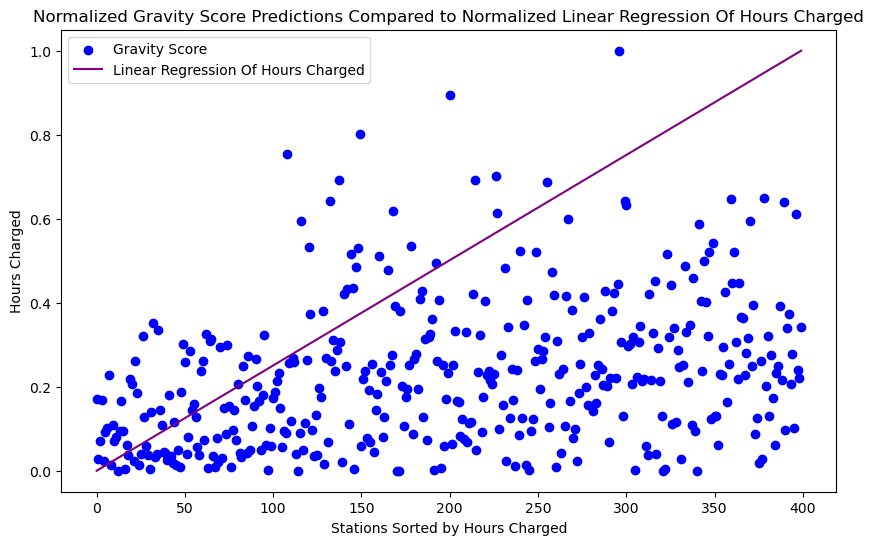

In [5]:
weights = {
"traffic_weight": 100.0,
"apartments_weight": 40,
"cinemas_weight":40,
"clinics_weight": 45,
"colleges_weight": 50,
"communityCentres_weight": 50,
"conferenceCentres_weight": 25,
"dentists_weight": 40,
"eventsVenues_weight": 40,
"fastFoods_weight": 75,
"hospitals_weight": 35,
"hotels_weight": 45,
"leisureFitnessCentres_weight": 45,
"leisureStadiums_weight": 25,
"motorwayLinks_weight": 80,
"motorways_weight": 60,
"parkings_weight": 0,
"placesOfWorship_weight": 40,
"restaurants_weight": 45,
"shopMalls_weight": 60,
"shopSupermarkets_weight": 35,
"sportsCentres_weight": 50,
"sportsHalls_weight": 55,
"stadiums_weight": 25,
"substationMinorDistributions_weight": 25,
"theatres_weight": 35,
"universities_weight": 45,
}
with open("weights_float.txt", "w") as file:
    for name, value in weights.items():
        file.write(f"{name} {float(value)}\n")


# Define the path to the compiled executable
executable_path = './gravityscore'

# The CSV file name to pass as an argument
csv_file_name = 'Allstations.csv'

# Run the compiled C++ program with the CSV file name as an argument
result = subprocess.run([executable_path, csv_file_name], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

# Process the result
if result.returncode == 0:
    print("C++ program output:\n", result.stdout)
else:
    print("Error running C++ program:\n", result.stderr)

df_gravity = pd.read_csv('gravityScoresWithDetails.csv')
#change all gravity that a negative to zero
df_gravity['gravity'] = df_gravity['gravity'].apply(lambda x: 0 if x < 0 else x)

#plot df_gravity where x asis the the index and y axis the gravity
plt.figure(figsize=(14, 10))
plt.plot(df_gravity.index, df_gravity['gravity'], marker='o', linestyle='-', color='blue')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Gravity Scores')
plt.title('Model Predictions for Station Gravity Scores on Hours Charged')
plt.grid(True, which="both", ls="--")
plt.show()
X = np.arange(len(df_moterway)).reshape(-1, 1)  # Element numbers as X
y = df_gravity['gravity'].values.reshape(-1, 1)
#y = df_reordered_sorted['status_3_ratio_mean'].values.reshape(-1, 1)  # status_3_ratio_mean as Y, reshaped for scaler

weights_all_names= {
    "traffic_weight": 0,
    "apartments_weight": 0.0009170220089808314,
    "cinemas_weight": 0.0003695260891993867,
    "clinics_weight": 0.06816398784563084,
    "colleges_weight": 0.04516284488369832,
    "communityCentres_weight": 3.752127410133192e-06,
    "conferenceCentres_weight": 0,
    "dentists_weight": 0.04454496428452166,
    "eventsVenues_weight": 0.00464102768317852,
    "fastFoods_weight": 0.1784694398954507,
    "hospitals_weight": 0.012237558734649497,
    "hotels_weight": 0.0030296000484235936,
    "leisureFitnessCentres_weight": 0.0029541970112504264,
    "leisureStadiums_weight": 0.0007992050029449315,
    "motorwayLinks_weight": 0.10788956583509418,
    "motorways_weight": 0.026636366560840775,
    "parkings_weight": 0.03238725958418013,
    "placesOfWorship_weight": 0.02349285891361788,
    "restaurants_weight": 0.02359104950734122,
    "shopMalls_weight": 0.047809737636703376,
    "shopSupermarkets_weight": 2.1277026279482327e-05,
    "sportsCentres_weight": 0,
    "sportsHalls_weight": 0.003479494421348886,
    "stadiums_weight": 0.10188558996882979,
    "substationMinorDistributions_weight": 0.05602740409259743,
    "theatres_weight": 0.005573301139133856,
    "universities_weight": 0
}

df_gravity = pd.read_csv('gravityScoresWithDetails.csv')
#change all gravity that a negative to zero
df_gravity['gravity'] = df_gravity['gravity'].apply(lambda x: 0 if x < 0 else x)

# Extracting names and removing '_weight' suffix
new_names = [name.replace('_weight', '') for name in weights_all_names.keys()]

# Generating new column names for df_gravity
# This includes keeping the original names for columns not being replaced
new_column_names = df_gravity.columns[:3].tolist() + new_names[:len(df_gravity.columns) - 3]

# Renaming the columns in df_gravity
df_gravity.columns = new_column_names

display(df_gravity)
#display the sum of each column
display(df_gravity.sum())
df_gravity.to_csv('gravityScoresWithDetails.csv')


scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_gravity_scaled = scaler_y.fit_transform(y)


# Calculate MSE on the scaled predictions
mse_scaled = mean_squared_error(y_gravity_scaled, y_scaled)
rmse = np.sqrt(mse_scaled)

mse = mean_squared_error(y, y_original)

print(f"Mean Squared Error (MSE) on scaled data: {mse_scaled}")
print(f"Root Mean Squared Error (RMSE) on scaled data: {rmse}")


# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y_gravity_scaled, color='blue', label='Gravity Score')
plt.plot(X, y_scaled, color='orange', label='Hours Charged')
plt.title('Normilized Gravity Score Predictions Compared to Normalized Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()


# Calculate MSE on the scaled predictions
mse_scaled = mean_squared_error(y_gravity_scaled, y_scaled_lin)
rmse = np.sqrt(mse_scaled)

# If you want to calculate MSE on the original scale
mse = mean_squared_error(y, y_original)

print(f"Mean Squared Error (MSE) on scaled data: {mse_scaled}")
print(f"Root Mean Squared Error (RMSE) on scaled data: {rmse}")

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y_gravity_scaled, color='blue', label='Gravity Score')
plt.plot(X, y_scaled_lin, color='purple', label='Linear Regression Of Hours Charged')
plt.title('Normalized Gravity Score Predictions Compared to Normalized Linear Regression Of Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()

